In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
from datetime import datetime

In [2]:
from typing import List

In [3]:
import os
import glob

In [4]:
from src.io.load import DataLoader

In [5]:
from abc import ABC, abstractmethod

In [6]:
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster

In [7]:
from src.preprocessing.preprocess import ProcessData
from src.main import load_data

In [8]:
import os
os.chdir(os.path.dirname(os.getcwd()))

## Load data

In [9]:
market_name = "germany"

prices = load_data(market_name)
prices = ProcessData(df=prices).run_preprocess()

In [10]:
prices

time
2019-01-01 00:00:00    10.07
2019-01-01 01:00:00    -4.08
2019-01-01 02:00:00    -9.91
2019-01-01 03:00:00    -7.41
2019-01-01 04:00:00   -12.55
                       ...  
2021-12-31 19:00:00     0.18
2021-12-31 20:00:00     0.08
2021-12-31 21:00:00     5.10
2021-12-31 22:00:00     6.32
2021-12-31 23:00:00    50.05
Freq: H, Name: value, Length: 26304, dtype: float64

In [21]:
hour_begin_trade = "13"

window_predict = {
    "date_start":"01-01-2020", 
    "date_end":"03-01-2017"
    }
dt =  datetime.strptime(' '.join([window_predict["date_start"], hour_begin_trade]), "%d-%m-%Y %H")

In [23]:
dt

datetime.datetime(2020, 1, 1, 13, 0)

In [24]:
prices.loc[dt:]

time
2020-01-01 13:00:00    30.75
2020-01-01 14:00:00    32.11
2020-01-01 15:00:00    35.98
2020-01-01 16:00:00    40.40
2020-01-01 17:00:00    44.05
                       ...  
2021-12-31 19:00:00     0.18
2021-12-31 20:00:00     0.08
2021-12-31 21:00:00     5.10
2021-12-31 22:00:00     6.32
2021-12-31 23:00:00    50.05
Freq: H, Name: value, Length: 17531, dtype: float64

In [14]:
idx_train = int(len(prices)*0.8)
x_train = prices[:idx_train]

In [15]:
from sktime.forecasting.ets import AutoETS
from sktime.forecasting.arima import AutoARIMA
from sktime.utils.plotting import plot_series

In [16]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing


In [113]:
forecaster = AutoETS(auto=True, n_jobs=-1, sp=12)

In [84]:
forecaster = AutoARIMA(sp=12, suppress_warnings=True)

In [43]:
forecaster = ExponentialSmoothing(trend="add", seasonal="additive", sp=12)


In [ ]:
forecaster.fit(x_train[:2000])

/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/sktime/forecasting/ets.py:248: UserWarning: Warning: time series is not strictly positive,multiplicative components are ommitted
  warnings.warn(


In [85]:
forecaster.fit(x_train[:2000])

AutoARIMA(sp=12, suppress_warnings=True)

In [44]:
forecaster.fit(x_train[:2000])

ExponentialSmoothing(seasonal='additive', sp=12, trend='add')

In [86]:
y_pred_arima = forecaster.predict(fh=np.arange(1, 25))

/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:565: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  cutoff = _coerce_to_period(cutoff, freq=cutoff.freqstr)


In [115]:
y_pred_ets = forecaster.predict(fh=np.arange(1, 25))

/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/sktime/utils/datetime.py:80: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if hasattr(x, "freqstr"):
/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/sktime/utils/datetime.py:81: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if x.freqstr is None:
/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/sktime/utils/datetime.py:83: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  elif "-" in x.freqstr:
/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/sktime/utils/datetime.py:86: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  return x.freqstr
/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:565: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a fut

In [45]:
y_pred_exp = forecaster.predict(fh=np.arange(1, 25))

/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/sktime/utils/datetime.py:80: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if hasattr(x, "freqstr"):
/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/sktime/utils/datetime.py:81: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if x.freqstr is None:
/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/sktime/utils/datetime.py:83: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  elif "-" in x.freqstr:
/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/sktime/utils/datetime.py:86: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  return x.freqstr
/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:565: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a fut

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='value'>)

<Figure size 1080x504 with 0 Axes>

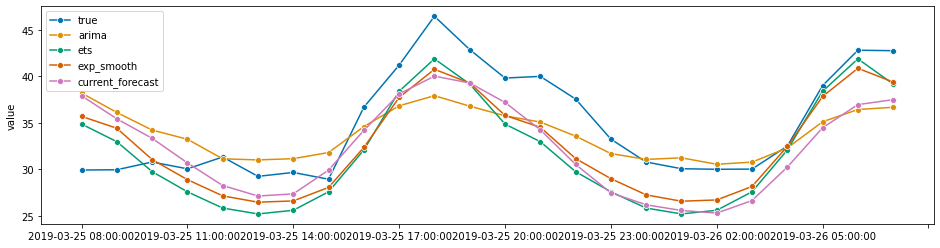

In [117]:
plt.figure(figsize=(15,7))
plot_series(x_train[2000:2024], 
            y_pred_arima, 
            y_pred_ets,
            y_pred_exp,
            y_pred_arima_rhi,
            labels=["true", "arima", "ets", 'exp_smooth', 'current_forecast'])

In [47]:
new_y = x_train[2000:2024]
forecaster.update(new_y)


/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/sktime/forecasting/base/_base.py:1640: UserWarning: NotImplementedWarning: ExponentialSmoothing does not have a custom `update` method implemented. ExponentialSmoothing will be refit each time `update` is called with update_params=True.
  warn(


ExponentialSmoothing(seasonal='additive', sp=12, trend='add')

In [49]:
x_train[1998:2000]

time
2019-03-25 06:00:00    38.39
2019-03-25 07:00:00    39.17
Freq: H, Name: value, dtype: float64

In [53]:
from sklearn.neighbors import KNeighborsRegressor
from sktime.forecasting.compose import make_reduction


In [59]:
regressor = KNeighborsRegressor(n_neighbors=1)
forecaster = make_reduction(regressor, window_length=24, strategy="recursive")
forecaster.fit(x_train[:2000])
y_pred_knn = forecaster.predict(np.arange(1, 25))

/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/sktime/utils/datetime.py:108: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  if not hasattr(x, "freq") or x.freq is None:
/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/sktime/utils/datetime.py:110: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  by *= x.freq
/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:565: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  cutoff = _coerce_to_period(cutoff, freq=cutoff.freqstr)


In [42]:
from src.forecast.factory import ModelForecastFactory


In [69]:
model_forecast = ModelForecastFactory().get_model(**{
                                        "name":"arima",
                                        "order":dict(p=24, d=1, q=0),
                                        "seasonal_order":None,
                                        })

In [71]:
model_forecast.train_model(x_train[:2000])
y_pred_arima_rhi = model_forecast.forecast(n_frames=24)

## Other

In [50]:
from sktime.forecasting.fbprophet import Prophet

ERROR:prophet.plot:Importing plotly failed. Interactive plots will not work.


In [ ]:
forecaster = Prophet(
    seasonality_mode="multiplicative",
    n_changepoints=int(len(y_train) / 12),
    add_country_holidays={"country_name": "Germany"},
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
)

## Evaluate

In [59]:
from sktime.forecasting.all import mean_squared_error, mean_absolute_error
from tqdm import tqdm

In [116]:
y = x_train[2000:2024]
print(mean_squared_error(y, y_pred_arima))
print(mean_squared_error(y, y_pred_ets))
print(mean_squared_error(y, y_pred_exp))
print(mean_squared_error(y, y_pred_arima_rhi))


17.86420774781494
17.62854282916496
13.59640956315477
19.809578686154325


In [ ]:
x_train[1980:2024], y_pred, y_pred_ets,y_pred_exp

In [19]:
n_frames = 24

date_start = "03-01-2020"
date_end = "03-30-2020"

date_start = pd.to_datetime(date_start)
date_end = pd.to_datetime(date_end)

n_frames_t = pd.Timedelta(hours=n_frames)

period = (date_end - date_start).days

In [20]:
period

29

In [21]:
split = date_start + 2*n_frames_t


In [27]:
prices.loc[date_start]

-3.88

https://www.sktime.org/en/stable/examples/01_forecasting.html

## AutoETS

In [53]:
n_frames = 24

date_start = "03-01-2020"
date_end = "03-30-2020"

date_start = pd.to_datetime(date_start)
date_end = pd.to_datetime(date_end)

n_frames_t = pd.Timedelta(hours=n_frames)

period = (date_end - date_start).days

x_train = prices[:date_start]

pred_list = []
forecaster = AutoETS(auto=True, n_jobs=-1, sp=12)

for p in tqdm(range(1,period)):
    forecaster.fit(x_train)
    pred_list.append(forecaster.predict(fh=np.arange(1, n_frames+1)))
    split = date_start + p*n_frames_t
    x_train = prices[:split]
    
y_true = prices[date_start:split]

  0%|                                                                                                                                                        | 0/28 [00:00<?, ?it/s]/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/sktime/utils/datetime.py:80: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if hasattr(x, "freqstr"):
/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/sktime/utils/datetime.py:81: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if x.freqstr is None:
/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/sktime/utils/datetime.py:83: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  elif "-" in x.freqstr:
/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/sktime/utils/datetime.py:86: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  return x.freq

 21%|██████████████████████████████▊                                                                                                                 | 6/28 [00:25<01:27,  3.97s/it]/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/sktime/forecasting/ets.py:248: UserWarning: Warning: time series is not strictly positive,multiplicative components are ommitted
  warnings.warn(
/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/sktime/utils/datetime.py:80: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if hasattr(x, "freqstr"):
/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/sktime/utils/datetime.py:81: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if x.freqstr is None:
/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/sktime/utils/datetime.py:83: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  elif "-" 

 43%|█████████████████████████████████████████████████████████████▎                                                                                 | 12/28 [00:41<00:43,  2.74s/it]/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/sktime/forecasting/ets.py:248: UserWarning: Warning: time series is not strictly positive,multiplicative components are ommitted
  warnings.warn(
/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/sktime/utils/datetime.py:80: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if hasattr(x, "freqstr"):
/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/sktime/utils/datetime.py:81: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if x.freqstr is None:
/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/sktime/utils/datetime.py:83: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  elif "-" 

 64%|███████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 18/28 [01:04<00:36,  3.62s/it]/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/sktime/forecasting/ets.py:248: UserWarning: Warning: time series is not strictly positive,multiplicative components are ommitted
  warnings.warn(
/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/sktime/utils/datetime.py:80: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if hasattr(x, "freqstr"):
/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/sktime/utils/datetime.py:81: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if x.freqstr is None:
/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/sktime/utils/datetime.py:83: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  elif "-" 

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 24/28 [01:24<00:12,  3.13s/it]/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/sktime/forecasting/ets.py:248: UserWarning: Warning: time series is not strictly positive,multiplicative components are ommitted
  warnings.warn(
/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/sktime/utils/datetime.py:80: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if hasattr(x, "freqstr"):
/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/sktime/utils/datetime.py:81: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if x.freqstr is None:
/home/martin/miniconda3/envs/rhizome/lib/python3.9/site-packages/sktime/utils/datetime.py:83: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  elif "-" 

In [54]:
y_pred_ets = pd.concat(pred_list,axis=0)

In [58]:
forecaster.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:                  value   No. Observations:                10849
Model:                       ETS(ANA)   Log Likelihood              -30840.409
Date:                Tue, 27 Sep 2022   AIC                          61712.818
Time:                        21:00:59   BIC                          61829.487
Sample:                    01-01-2019   HQIC                         61752.151
                         - 03-28-2020   Scale                           17.245
Covariance Type:               approx                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.9956      0.010    101.750      0.000       0.976       1.015
smoothing_seasonal      0.0044      0.001      7.308      0.000       0.003       0.006
initial_level          -4.5112        nan        nan        nan         nan         nan
initial_seasonal.0      1.6773        nan        nan        nan         nan         nan
initial_seasonal.1      3.8575        nan        nan        nan         nan         nan
initial_seasonal.2      6.9982        nan        nan        nan         nan         nan
initial_seasonal.3      8.8482        nan        nan        nan         nan         nan
initial_seasonal.4     12.5750        nan        nan        nan         nan         nan
initial_seasonal.5     14.6289        nan        nan        nan         nan         nan
initial_seasonal.6     12.9964        nan        nan        nan         nan         nan
initial_seasonal.7      8.2901        nan        nan        nan         nan         nan
initial_seasonal.8      3.2940        nan        nan        nan         nan         nan
initial_seasonal.9      0.6695        nan        nan        nan         nan         nan
initial_seasonal.10    -0.2910        nan        nan        nan         nan         nan
initial_seasonal.11          0        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (Q):                     2893.87   Jarque-Bera (JB):             97428.19
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.52
Prob(H) (two-sided):                  0.30   Kurtosis:                        17.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
[2] Covariance matrix is singular or near-singular, with condition number 3.82e+14. Standard errors may be unstable.
"""

In [60]:
print(mean_absolute_error(y_true[1:], y_pred))

7.543419441698955


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='value'>)

<Figure size 1080x504 with 0 Axes>

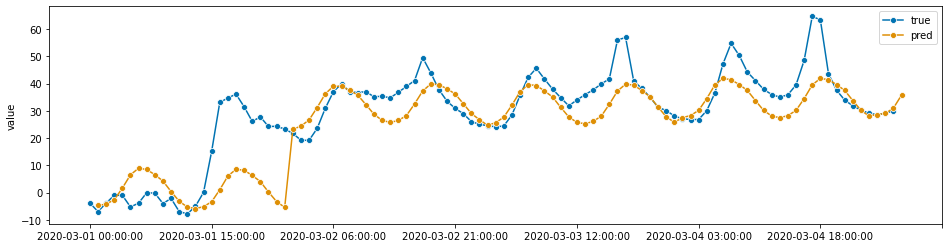

In [57]:
plt.figure(figsize=(15,7))
plot_series(y_true[:100],
            y_pred_ets[:100], 
            labels=["true", "pred"])

## Current forecaster

In [ ]:
n_frames = 24

date_start = "03-01-2021"
date_end = "03-30-2021"

date_start = pd.to_datetime(date_start)
date_end = pd.to_datetime(date_end)

n_frames_t = pd.Timedelta(hours=n_frames)

period = (date_end - date_start).days

x_train = prices[:date_start]

pred_list = []
forecaster = ModelForecastFactory().get_model(**{
                                        "name":"arima",
                                        "order":dict(p=24, d=1, q=0),
                                        "seasonal_order":None,
                                        })

for p in tqdm(range(1,period)):
    forecaster.train_model(x_train)
    pred_list.append(forecaster.forecast(n_frames=n_frames))
    split = date_start + p*n_frames_t
    x_train = prices[:split]
    
y_true = prices[date_start:split]

In [ ]:
y_pred_arima = pd.concat(pred_list,axis=0)

In [61]:
print(mean_absolute_error(y_true[1:], y_pred_arima))

7.8712975898046365


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='value'>)

<Figure size 1080x504 with 0 Axes>

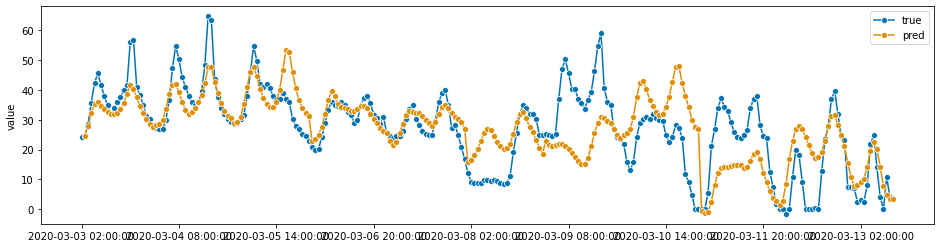

In [62]:
plt.figure(figsize=(15,7))
plot_series(y_true[50:300],
            y_pred_arima[50:300], 
            labels=["true", "pred"])

## Moving Average

In [ ]:
n_frames = 24

date_start = "03-01-2020"
date_end = "03-30-2020"

date_start = pd.to_datetime(date_start)
date_end = pd.to_datetime(date_end)

n_frames_t = pd.Timedelta(hours=n_frames)

period = (date_end - date_start).days

x_train = prices[:date_start]

pred_list = []

for p in tqdm(range(1,period)):
    pred_list.append()
    split = date_start + p*n_frames_t
    x_train = prices[:split]
    
y_true = prices[date_start:split]